In [1]:
import pandas as pd

In [29]:
df= pd.read_csv(r"C:\Users\jwali\Downloads\Kaggle\RL\train.txt" ,sep='\t', header=0, names=columns, nrows=10000)

In [31]:
df.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
1,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
2,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
3,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN
4,0,NaN,-1,NaN,NaN,12824.0,NaN,0.0,0.0,6.0,...,776ce399,92555263,NaN,NaN,242bb710,8ec974f4,be7c41b4,72c78f11,NaN,NaN


In [33]:
columns = ['label'] + [f'I{i}' for i in range(1, 14)] + [f'C{i}' for i in range(1, 27)]


In [35]:
df.size

400000

In [37]:
df.isnull().sum()

label       0
I1       4482
I2          0
I3       2037
I4       1978
I5        494
I6       2511
I7        492
I8         10
I9        492
I10      4482
I11       492
I12      7734
I13      1978
C1          0
C2          0
C3        357
C4        357
C5          0
C6       1332
C7          0
C8          0
C9          0
C10         0
C11         0
C12       357
C13         0
C14         0
C15         0
C16       357
C17         0
C18         0
C19      4497
C20      4497
C21       357
C22      8181
C23         0
C24       357
C25      4497
C26      4497
dtype: int64

In [51]:
df['C10'].unique().size

2986

In [53]:
df['C10'].size

10000

In [55]:
df.shape

(10000, 40)

In [39]:
df.describe()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
count,10000.000000,5518.000000,10000.000000,7963.000000,8022.000000,9.506000e+03,7489.000000,9508.000000,9990.000000,9508.000000,5518.000000,9508.000000,2266.000000,8022.000000
mean,0.218200,3.380029,110.866300,46.955670,8.013962,1.708457e+04,143.582988,14.529764,13.086086,124.744531,0.577021,2.347707,0.893645,10.910371
std,0.413045,9.420610,443.485586,893.981374,11.027063,6.256848e+04,365.877571,52.581595,17.570338,277.488773,0.656359,4.563456,3.805153,20.051531
min,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,2.720000e+02,9.000000,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,3.000000,7.000000,4.000000,2.491500e+03,40.000000,3.000000,7.000000,41.000000,0.000000,1.000000,0.000000,5.000000
75%,0.000000,3.000000,38.000000,21.000000,10.000000,1.049375e+04,130.000000,10.000000,20.000000,123.000000,1.000000,2.000000,1.000000,13.000000
max,1.000000,214.000000,18522.000000,65535.000000,280.000000,1.618112e+06,12167.000000,1658.000000,682.000000,7335.000000,6.000000,79.000000,98.000000,770.000000


In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = df.dropna(subset=['label']).reset_index(drop=True)

In [43]:
df.size

400000

In [45]:
# Fill missing numerical values with 0
num_cols = [f'I{i}' for i in range(1, 4)]


In [47]:
num_cols

['I1', 'I2', 'I3']

In [57]:
df[num_cols] = df[num_cols].fillna(0)

In [59]:
cat_cols = [f'C{i}' for i in range(1, 3)]
df[cat_cols] = df[cat_cols].fillna('missing')

In [63]:
df['I1'].isnull().sum()

0

In [65]:
scaler = StandardScaler()
X_num = scaler.fit_transform(df[num_cols])

In [67]:
X_num 

array([[ 0.01874557, -0.25000101,  0.00828299],
       [ 0.01874557, -0.25000101, -0.04560685],
       [-0.25917243,  1.76369387, -0.0468601 ],
       ...,
       [ 0.57458157, -0.24549105, -0.04184709],
       [-0.25917243, -0.2206863 , -0.03934059],
       [-0.25917243, -0.20264648,  0.01956226]])

In [71]:
df[num_cols]

,I1,I2,I3
0,2.0,0,44.0
1,2.0,0,1.0
2,0.0,893,0.0
3,3.0,-1,0.0
4,0.0,-1,0.0
...,...,...,...
9995,1.0,40,2.0
9996,6.0,18,3.0
9997,6.0,2,4.0
9998,0.0,13,6.0


In [75]:
import numpy as np

In [77]:
encoders = {col: LabelEncoder().fit(df[col]) for col in cat_cols}
X_cat = np.stack([encoders[col].transform(df[col]) for col in cat_cols], axis=1)

In [79]:
encoders

{'C1': LabelEncoder(), 'C2': LabelEncoder()}

In [81]:
X_cat


array([[ 75, 369],
       [ 18,  18],
       [ 75,  64],
       ...,
       [  1,  80],
       [  1,  46],
       [ 63, 192]])

In [83]:
X = np.concatenate([X_num, X_cat], axis=1)

In [85]:
y = df['label'].astype(int).values

In [91]:
 11 % 3

2

In [93]:
class LinUCB:
    def __init__(self, n_arms, n_features, alpha=0.5):
        self.alpha = alpha
        self.n_arms = n_arms
        self.n_features = n_features
        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros((n_features,)) for _ in range(n_arms)]

    def predict(self, x):
        p = np.zeros(self.n_arms)
        for a in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[a])
            theta = A_inv @ self.b[a]
            p[a] = theta @ x + self.alpha * np.sqrt(x.T @ A_inv @ x)
        return np.argmax(p)

    def update(self, chosen_arm, x, reward):
        self.A[chosen_arm] += np.outer(x, x)
        self.b[chosen_arm] += reward * x


In [97]:
def assign_arm(categorical_value):
    return categorical_value % 3  # convert C1 into 3 ad categories


In [99]:
arms = 3
context_dim = X.shape[1]

In [101]:
agent = LinUCB(n_arms=arms, n_features=context_dim, alpha=0.5)
rewards = []

In [103]:
for i in range(len(X)):
    x = X[i]
    true_arm = assign_arm(X_cat[i][0])  # from C1
    chosen_arm = agent.predict(x)

    reward = 1 if chosen_arm == true_arm and y[i] == 1 else 0
    agent.update(chosen_arm, x, reward)
    rewards.append(reward)

In [107]:
import matplotlib.pyplot as plt

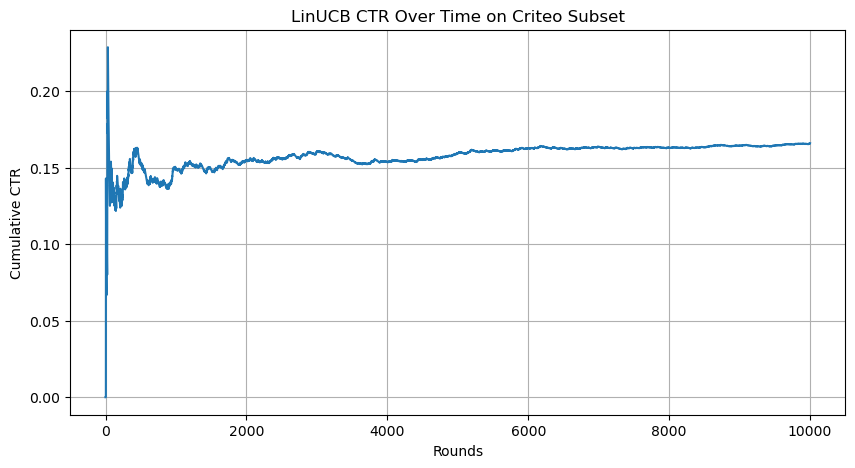

Final CTR: 0.166


In [109]:
cumulative_ctr = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_ctr)
plt.title("LinUCB CTR Over Time on Criteo Subset")
plt.xlabel("Rounds")
plt.ylabel("Cumulative CTR")
plt.grid(True)
plt.show()

print(f"Final CTR: {cumulative_ctr[-1]:.3f}")


In [111]:
ad_texts = {
    0: "Discount running shoes for fitness lovers",
    1: "Zero-fee credit card with cashback rewards",
    2: "Next-gen gaming console with 4K graphics"
}


In [115]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [117]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate 384-d embeddings for each ad
ad_embeddings = {k: model.encode([text])[0] for k, text in ad_texts.items()}


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\jwali\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jwali\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [119]:
ad_embeddings

{0: array([-8.45920369e-02,  2.34854519e-02, -6.14127144e-03,  2.93060318e-02,
         3.43144611e-02,  4.10150457e-03, -4.30360921e-02, -2.65921955e-03,
        -1.53735047e-02,  1.13296704e-02,  4.25622799e-02,  5.56623153e-02,
        -1.50440596e-02, -6.19575940e-02,  3.99772935e-02,  1.34815918e-02,
         1.65906306e-02,  2.72078607e-02, -4.12864648e-02, -2.09412747e-03,
        -7.67556727e-02, -8.28351751e-02,  2.75671165e-02,  3.95156182e-02,
        -8.24887156e-02,  5.50229587e-02,  1.99594107e-02,  1.82900112e-02,
        -5.37319072e-02,  9.63969901e-03,  2.71802153e-02, -9.10798088e-02,
         7.03062564e-02, -3.59551306e-03,  4.97080535e-02, -3.55692357e-02,
         4.67898138e-02, -6.63705468e-02, -1.12266861e-01,  8.75886604e-02,
         1.30126653e-02, -9.98339951e-02, -6.84763789e-02,  6.26031607e-02,
         2.57009715e-02, -9.01232287e-03, -3.83579880e-02,  3.34104560e-02,
        -4.56460938e-02,  8.04084092e-02, -1.66002680e-02, -3.42399850e-02,
         

In [121]:
ad_embeddings = {arm: model.encode([desc])[0] for arm, desc in ad_texts.items()}

In [127]:
embedding_dim =ad_embeddings[0].shape[0]

In [131]:
embedding_dim

384

In [143]:
context_dim = X.shape[1] + embedding_dim

In [133]:
arms = 3

In [137]:
from tqdm import tqdm

In [141]:
class LinUCB:
    def __init__(self, n_arms, n_features, alpha=0.5):
        self.alpha = alpha
        self.n_arms = n_arms
        self.n_features = n_features
        self.A = [np.identity(n_features) for _ in range(n_arms)]
        self.b = [np.zeros((n_features,)) for _ in range(n_arms)]

    def predict(self, x_contexts):  # receives one context vector per arm
        p = np.zeros(self.n_arms)
        for a in range(self.n_arms):
            A_inv = np.linalg.inv(self.A[a])
            theta = A_inv @ self.b[a]
            x = x_contexts[a]  # context vector for this arm
            p[a] = theta @ x + self.alpha * np.sqrt(x.T @ A_inv @ x)
        return np.argmax(p)

    def update(self, chosen_arm, x, reward):
        self.A[chosen_arm] += np.outer(x, x)
        self.b[chosen_arm] += reward * x


In [145]:
agent = LinUCB(n_arms=3, n_features=context_dim, alpha=0.5)

In [147]:
for i in tqdm(range(len(X))):
    x = X[i]                         # Base features (numerical + cat)
    user_c1_value = X_cat[i][0]     # Use C1 to determine ad category
    true_arm = user_c1_value % 3    # Assign arm (0, 1, or 2)
    
    # Build full context vector per arm
    contexts = []
    for arm in range(arms):
        full_context = np.concatenate([x, ad_embeddings[arm]])
        contexts.append(full_context)
    
    # Predict and update
    chosen_arm = agent.predict(contexts)
    reward = 1 if chosen_arm == true_arm and y[i] == 1 else 0
    agent.update(chosen_arm, contexts[chosen_arm], reward)
    
    rewards.append(reward)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:05<00:00, 53.81it/s]


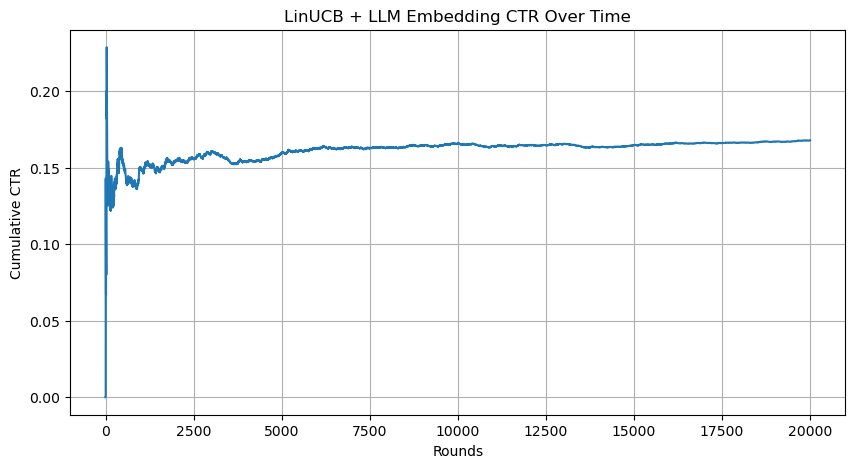

Final CTR with LLM features: 0.168


In [149]:
import matplotlib.pyplot as plt

cumulative_ctr = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
plt.figure(figsize=(10, 5))
plt.plot(cumulative_ctr)
plt.title("LinUCB + LLM Embedding CTR Over Time")
plt.xlabel("Rounds")
plt.ylabel("Cumulative CTR")
plt.grid(True)
plt.show()

print(f"Final CTR with LLM features: {cumulative_ctr[-1]:.3f}")
